In [4]:
import pandas as pd

In [5]:
import csv

In [6]:
data = []
for line in csv.reader(open('metoo_tweets_dec2017.csv', encoding="utf8", errors='ignore')):
    data.append(line)

In [7]:
datapd = pd.DataFrame(data)

In [8]:
datapd = datapd.rename(columns=datapd.iloc[0])

#datapd = pd.read_pickle('metwoo_pd.pkl')

In [9]:
datapd.to_pickle('metoo_pd.pkl')

In [10]:
datapd2 = datapd[datapd.replyToSN != 'NA']


In [13]:
replies = datapd.groupby('replyToSN').count()

In [14]:
replies.sort_values('text')[-10:]

,,text,favorited,favoriteCount,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
replyToSN,,,,,,,,,,,,,,,,
FoxNews,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271
CNN,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
SenFranken,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313
thehill,374,374,374,374,374,374,374,374,374,374,374,374,374,374,374,374
TIME,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
rosemcgowan,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511
SenGillibrand,662,662,662,662,662,662,662,662,662,662,662,662,662,662,662,662
Alyssa_Milano,746,746,746,746,746,746,746,746,746,746,746,746,746,746,746,746
realDonaldTrump,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062


In [27]:
tweet_pairs = datapd2[['screenName', 'replyToSN']]
tweet_pairs_small = tweet_pairs.sample(100)

In [80]:
t = datapd2.groupby('replyToSN').count()
t = t[t.text > 200]

In [81]:
pop = list(t.index)

datapd3 = datapd2[datapd2.replyToSN.isin(pop)]

In [82]:
datapd3.created = datapd3.created.astype('datetime64[ns]')

/Users/anastassia.kornilova/miniconda3/envs/ml_demo/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [83]:
datapd3['date'] = datapd3.created.dt.date

/Users/anastassia.kornilova/miniconda3/envs/ml_demo/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
test = datapd3.groupby(['replyToSN','date']).count().reset_index()

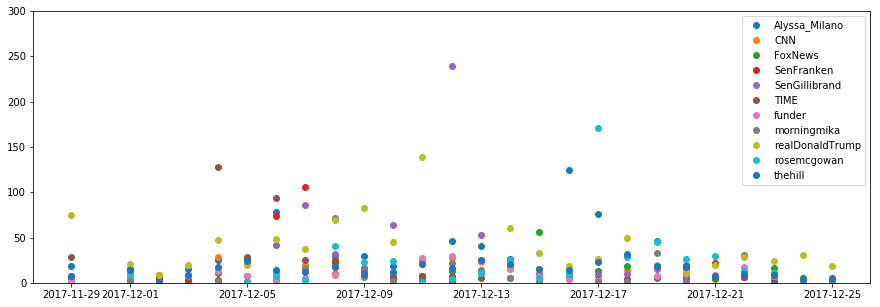

In [96]:
plt.figure(figsize=(15, 5))
i = 0
for name, rows in test.groupby('replyToSN'):
    plt.plot_date(rows.date, rows.id, label=name)
    i += 1

plt.ylim(0,300)
plt.legend()

In [87]:
rows

,,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,date
840,840,@thehill The @Energizer keeps going and going ...,FALSE,0,thehill,2017-11-29 22:23:00,FALSE,9.36e+17,9.36e+17,1917731,"<a href=""http://twitter.com/download/iphone"" r...",JoshJane,0,FALSE,FALSE,NA,NA,2017-11-29
1097,1097,@thehill All of them getting away with unwante...,FALSE,0,thehill,2017-11-29 21:53:00,TRUE,9.36e+17,9.36e+17,1917731,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",CJMcG56,0,FALSE,FALSE,NA,NA,2017-11-29
1470,1470,@thehill Stop forcing innocent woman into your...,FALSE,0,thehill,2017-11-29 21:10:00,FALSE,9.36e+17,9.36e+17,1917731,"<a href=""http://twitter.com/download/android"" ...",1stwifeMrsS,0,FALSE,FALSE,NA,NA,2017-11-29
2148,2148,"@thehill As are all women, in the GOPs eyes. T...",FALSE,2,thehill,2017-11-29 19:36:00,FALSE,9.36e+17,9.36e+17,1917731,"<a href=""http://twitter.com/download/iphone"" r...",jcampanelliNYC,0,FALSE,FALSE,NA,NA,2017-11-29
3290,3290,@thehill Yes-it is a sign of progress!!! Out ...,FALSE,0,thehill,2017-11-29 17:27:00,FALSE,9.36e+17,9.36e+17,1917731,"<a href=""http://www.twitter.com"" rel=""nofollow...",Bethe57,0,FALSE,FALSE,NA,NA,2017-11-29
3757,3757,@thehill When the #MeToo hashtag first trended...,FALSE,1,thehill,2017-11-29 16:24:00,TRUE,9.36e+17,9.36e+17,1917731,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",christine_w56,0,FALSE,FALSE,NA,NA,2017-11-29
3901,3901,@thehill @FoxNews. #MeToo -while I was active ...,FALSE,0,thehill,2017-11-29 16:04:00,FALSE,9.36e+17,9.36e+17,1917731,"<a href=""http://twitter.com/download/android"" ...",g_unit00,0,FALSE,FALSE,NA,NA,2017-11-29
5106,5106,@thehill And the fight behind closed doors goe...,FALSE,0,thehill,2017-12-01 23:41:00,FALSE,9.37e+17,9.37e+17,1917731,"<a href=""http://twitter.com/download/android"" ...",pamelakivett,0,FALSE,FALSE,NA,NA,2017-12-01
5536,5536,@thehill Donating proceeds to Moore۪s accusers...,FALSE,1,thehill,2017-12-01 22:56:00,TRUE,9.37e+17,9.37e+17,1917731,"<a href=""http://twitter.com/download/iphone"" r...",DustinUssery1,0,FALSE,FALSE,NA,NA,2017-12-01
5662,5662,@thehill START HERE!!!!!! #METOO https://t.co/...,FALSE,0,thehill,2017-12-01 22:38:00,FALSE,9.37e+17,9.37e+17,1917731,"<a href=""http://twitter.com/download/android"" ...",DFillmore52,0,FALSE,FALSE,NA,NA,2017-12-01
